Primeiro modelo - Regressão linear usando tensor flow.

O modelo de regressão linear consiste na concatenação de N variáveis e tenta encontrar um modelo linear no qual os dados sejam classificados corretamente pela variável resposta.

Para esse conjunto de teste foi utilizado uma base de dados de celulares, onde após uma analise exploratória inicial identificamos que os dados estavam uniformemente distribuidos. 

O objetivo desse problema é identificar a faixa de preço de um celular dado um conjunto de 20 características.

A faixa de preço varia de 0-3. 

Iniciamos o estudo usando o modelo de regressão linear, por ser o mais simples de ser executado.

Fizemos a normalização das escalas das variáveis para que o modelo pudesse ser executado corretamente e obtivemos uma taxa de erro superior a 200

Fez-se uma segunda avaliação e identificou-se uma correlação de 91% da variavel 'ram' com o preço e 20% da variável da 'battery_power' com o preço.

Ao repetir-se o algoritmo com apenas essas duas variáveis, a taxa de erro caiu para 8, contudo ainda está muito elevada. 

Ao plotarmos os graficos da amplitude da bateria e ram, foi possível visualizar o crescimento linear, porém com a elevada faixa de preço, o que torna inviavel o modelo linear com somente essa variavel para determinar o preço de um celular. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import image
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import datetime

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test_set.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>],
       [<AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>],
       [<AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>],
       [<AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>],
       [<AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}

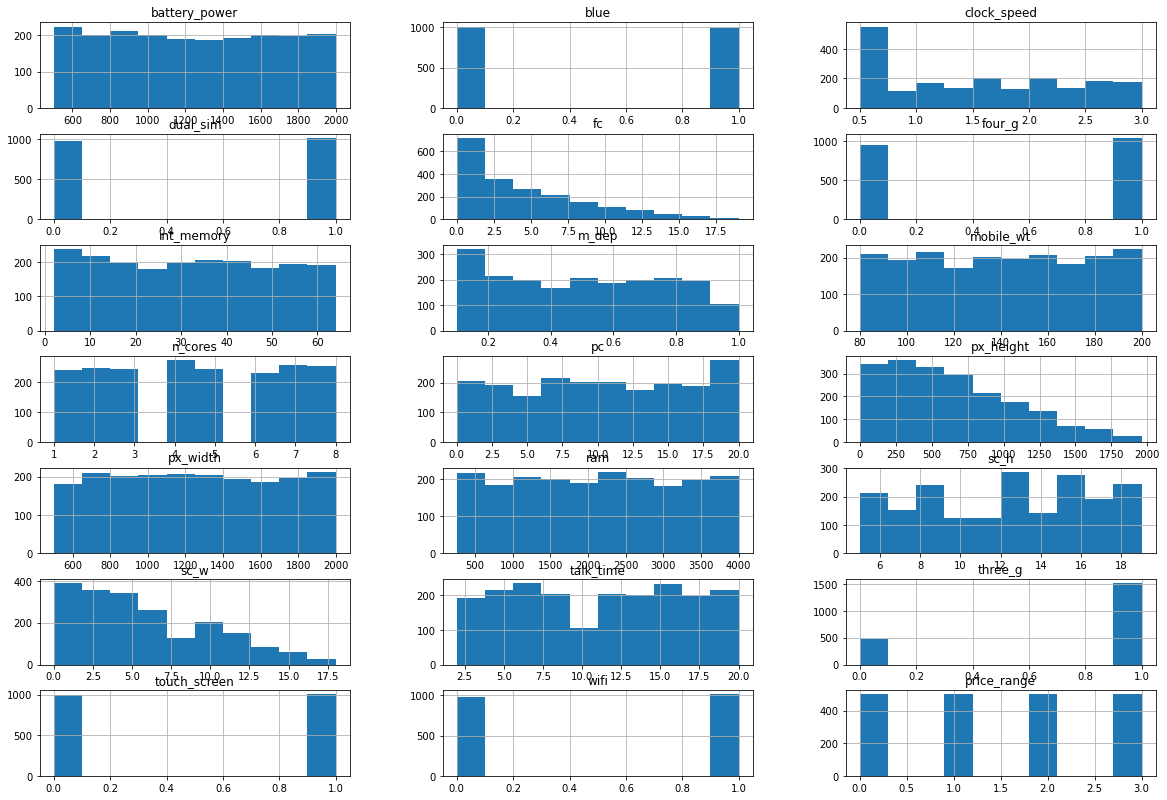

In [5]:
#Analise exploratoria do conjunto de treinamento
train_set.hist(layout=(10,3), figsize=(20,20))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>],
       [<AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>],
       [<AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>],
       [<AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>],
       [<AxesSubplot:title={'center':'sc_h'}>,
        <AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>],
       [<AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,

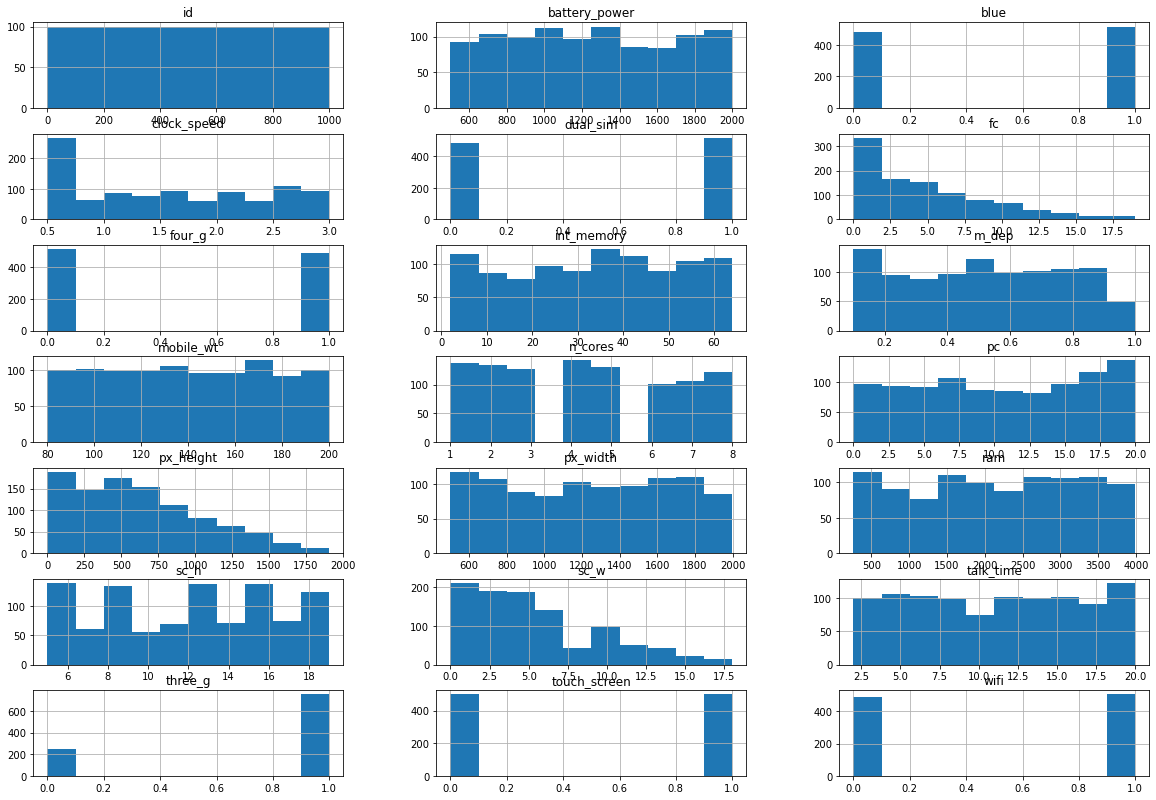

In [6]:
test_set.hist(layout=(10,3), figsize=(20,20))

In [7]:
#Identificamos que:
#Variavel resposta: price_range
#Variaveis categoricas: three_g, wi_fi, touch_screen, blue, dual_sim, four_g, n_cores, 
#Variaveis continuas: battery_power, clock_speed, fc, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

#Escala: Normalização de escala (0-20) 
#Motivo: Menor valor de escala entre 4 variaveis que usam essa escana naturalmente
#Pode ser alterado conforme necessidade do modelo
#Variaveis a serem normalizadas: battery_power, int_memory, ram, px_height, px_width

#Distribuição dos celulares está praticamente uniforme em todos os ranges. Novos ajustes não serão considerados
#até o momento

#Iremos testar uma regressão logística para verificar se o modelo se adequa os dados de teste.

In [8]:
variaveis_continuas = train_set[['px_height', 'px_width', 'mobile_wt']].values / 100
#variaveis_continuas = train_set[['ram']].values

In [9]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['ram']].values / 200, axis = 1)
#variaveis_continuas = np.append(variaveis_continuas, train_set [['battery_power']].values / 100, axis = 1)

In [10]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['int_memory']].values / 3, axis = 1)

In [11]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['clock_speed', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time' ]].values , axis = 1)

In [12]:
variaveis_categoricas = train_set[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].values

In [13]:
eixo_X = np.concatenate ([variaveis_continuas, variaveis_categoricas], axis = 1)
#eixo_X = variaveis_continuas

In [14]:
eixo_Y = train_set[['price_range']].values

In [15]:
dados_treino, dados_teste, classe_treino, classe_teste = train_test_split(eixo_X, eixo_Y, test_size=0.2)

In [16]:
X_teste = tf.constant(dados_teste, dtype=tf.float32)
Y_teste = tf.constant(classe_teste, dtype=tf.float32)

X_treino = tf.constant(dados_treino, dtype=tf.float32 )
Y_treino = tf.constant(classe_treino, dtype=tf.float32)



In [17]:
# Função para calcular o erro quadrado médio
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

# Função para calcular a derivada do erro
def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
# Função para calcular a hipótese (aproximação da função alvo)
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [18]:

# Inicializando os hiperparâmetros
num_epochs = 100
num_samples = X_treino.shape[0]
batch_size = 10
learning_rate = 0.001

num_features = X_treino.shape[1]

# Inicializando os pesos com valores aleartórios
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

# Coletando amostras dos dados para o treinamento e criando um iterador
dataset = tf.data.Dataset.from_tensor_slices(( X_treino , Y_treino )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()


Iniciando o Treinamento:
A taxa de erro é igual a 258.2047424316406
A taxa de erro é igual a 227.09414672851562
A taxa de erro é igual a 238.69955444335938
A taxa de erro é igual a 224.4259796142578
A taxa de erro é igual a 236.1188507080078
A taxa de erro é igual a 233.97885131835938
A taxa de erro é igual a 224.0904083251953
A taxa de erro é igual a 226.5797882080078
A taxa de erro é igual a 224.5902862548828
A taxa de erro é igual a 228.5485382080078
A taxa de erro é igual a 239.25146484375
A taxa de erro é igual a 238.55160522460938
A taxa de erro é igual a 232.95333862304688
A taxa de erro é igual a 230.90115356445312
A taxa de erro é igual a 236.2739715576172
A taxa de erro é igual a 228.9134521484375
A taxa de erro é igual a 240.8854522705078
A taxa de erro é igual a 232.2662811279297
A taxa de erro é igual a 234.2487335205078
A taxa de erro é igual a 235.3643035888672
A taxa de erro é igual a 222.7504425048828
A taxa de erro é igual a 227.71762084960938
A taxa de erro é igual 

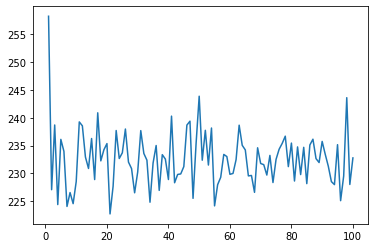


Mean Absolute Error (MAE) = 12.031867980957031



O preço de um celular com caracteristicas x :
[16.98 17.47 1.03 ... 1 0 0]

É de:
[3]




In [19]:

# Variáveis para o TensorBoard (substitua dmpm pelo seu usuário ao executar no Titan)
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = '/tmp/dmpm/logregmodel/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)


print('\nIniciando o Treinamento:')

# Loop para o treinamento
for i in range( num_epochs ) :
    
    epoch_loss = list()

    for b in range( int(num_samples/batch_size) ):

        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output )
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 

    with train_summary_writer.as_default():
        tf.summary.scalar('loss', loss, step=i)
    
    print( 'A taxa de erro é igual a {}'.format( loss ) ) 


# Plot do resultado do treino
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

# Gera previsões com os dados de teste
output = h( X_teste , weights , bias ) 
labels = Y_teste

# Calcula a acurácia
accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( '\nMean Absolute Error (MAE) = {}'.format( accuracy_op.result().numpy() ) )
print('\n')

print('\nO preço de um celular com caracteristicas x :')
tf.print(X_teste[0,:])
print('\nÉ de:')
tf.print(Y_teste[0])
print('\n')


In [20]:
train_set.corr(method='pearson')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


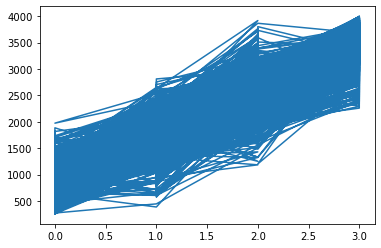

In [21]:
pyplot.plot(train_set['price_range'], train_set['ram'])

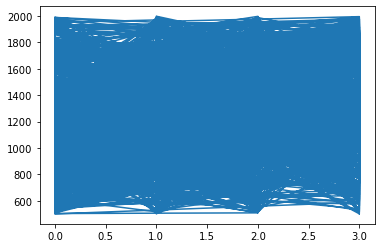

In [22]:
pyplot.plot(train_set['price_range'], train_set['px_width'])